# 3. Feature Enginerring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import KBinsDiscretizer
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [2]:
import os 
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
import src.data_loading as dl
import scripts.feature_enigneering as fe

In [4]:
output_data = '../data/processed'
df = pd.read_csv(output_data + '/processed_data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], format='%Y-%m-%dT%H:%M:%SZ')

1. Create Aggregate Features

In [7]:
# Total transaction amount 
df['TotalTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('sum')

In [8]:
# Average Transaction Amount
# df['AverageTransactionAmount'] = df['CustomerId'].map(df.groupby('CustomerId')['Amount'].apply(lambda x: x.abs().mean()))

In [8]:
df['AverageTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('mean')

In [9]:
# Transaction Count
df['TransationCount'] = df.groupby('CustomerId')['TransactionId'].transform('count')

In [10]:
df['Recency'] = (df['TransactionStartTime'] - df['CustomerId'].map(df.groupby('CustomerId')['TransactionStartTime'].max())).dt.days
df['Recency'] = df['Recency'].apply(lambda x: abs(x))  # Use absolute value

Note that the std function will calculate the population standard deviation by default. So i want to calculate the sample standard deviation, so i can use the ddof parameter:

In [12]:
# Standard Deviation of Transaction Amounts
# df['StdTransactionAmount'] = df['CustomerId'].map(
#    df.groupby('CustomerId')['Amount'].apply(lambda x: x.abs().std()).fillna(0)
# )

In [11]:
df['StdTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)

In [12]:
#categorical and numerical columns into variables
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

## 2. Extract Features

In [13]:
# Apply the function
fe.extract_features(df, ['TransactionStartTime'])

In [14]:
pd.set_option('display.max_columns', None)
df.sample(6)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,Recency,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed
39017,140317,77725,4841,3829,1831,UGX,256,4,6,financial_services,2,-500.0,500,2018-12-24 14:01:27,2,0,296800.0,21200.000000,14,19,39865.485361,12,52,24,0,358,False,False,False,False,False,False,14,1,27,1545660087
94394,77929,69515,537,3794,872,UGX,256,6,10,airtime,3,1000.0,1000,2019-02-12 07:29:48,2,0,92168.0,1071.720930,86,2,1846.595396,2,7,12,1,43,False,False,False,False,False,False,7,29,48,1549956588
66307,56455,62565,3156,1395,3582,UGX,256,6,3,airtime,3,1000.0,1000,2019-01-20 15:43:11,2,0,66665.0,966.159420,69,23,1352.416722,1,3,20,6,20,False,False,False,False,False,False,15,43,11,1547998991
83398,37003,30095,2648,1311,3066,UGX,256,6,10,airtime,3,1000.0,1000,2019-02-02 16:48:25,2,0,1119116.0,1828.620915,612,11,5212.148703,2,5,2,5,33,False,False,False,False,False,False,16,48,25,1549126105
1382,91800,71180,1709,2587,2094,UGX,256,6,3,airtime,3,5000.0,5000,2018-11-16 11:18:17,2,0,492544.6,3157.337179,156,87,7646.634549,11,46,16,4,320,False,False,False,False,False,False,11,18,17,1542367097
18218,67606,81065,2393,1205,2807,UGX,256,6,10,airtime,3,4400.0,4400,2018-12-06 13:07:01,2,0,134914.0,4652.206897,29,4,7058.913703,12,49,6,3,340,False,False,False,False,False,False,13,7,1,1544101621


In [15]:
# Boolean to int 
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

## Encode Categorical Variables

In [16]:
# Group Aggregation
fe.encode_AG(df, 'CustomerId', ['Value'], ['mean','min','max','std'])

CustomerId_Value_mean , CustomerId_Value_min , CustomerId_Value_max , CustomerId_Value_std , 

In [17]:
# Combine Features
fe.encode_CB(df, 'ProductId', 'ProductCategory')

ProductId_ProductCategory , 

In [18]:
# Group Aggregation NUnique
# How many Transaction does each Customer made
fe.encode_AG2(df, 'CustomerId', ['TransactionId'])   

CustomerId_TransactionId_ct , 

In [19]:
# How many type of product are each customer used 
fe.encode_AG2(df, 'CustomerId', ['ProductId', 'ProductCategory'])

CustomerId_ProductId_ct , CustomerId_ProductCategory_ct , 

In [20]:
# Divide meanTransac by the current trans
df["Value_Mean_Ratio"] = df["Value"]/df["CustomerId_Value_mean"]
df["Value_Mean_Ratio"] = df["Value"]/df["CustomerId_Value_mean"]

In [21]:
# Subtract meanTransac by the current trans
df["Value_Mean_Minus"] = df["Value"]-df["CustomerId_Value_mean"]
df["Value_Mean_Minus"] = df["Value"]-df["CustomerId_Value_mean"]

In [22]:
df = fe.aggregate_data(['CustomerId', 'ProductId'], ['Value'], ['mean','min','max','std'], df, fillna=True, use_na=False)
df = fe.aggregate_data(['CustomerId', 'ProductCategory'], ['Value'], ['mean','min','max','std'], df, fillna=True, use_na=False)

'CustomerId_ProductId_Value_mean' , 'CustomerId_ProductId_Value_min' , 'CustomerId_ProductId_Value_max' , 'CustomerId_ProductId_Value_std' , 'CustomerId_ProductCategory_Value_mean' , 'CustomerId_ProductCategory_Value_min' , 'CustomerId_ProductCategory_Value_max' , 'CustomerId_ProductCategory_Value_std' , 

In [23]:
# Ratio of product_value mean to current value mean
df["CustomerId_ProductCategory_Value_Ratio"] = df["Value"]/df["CustomerId_ProductCategory_Value_mean"]
df["CustomerId_ProductCategory_Value_Ratio"] = df["Value"]/df["CustomerId_ProductCategory_Value_mean"]

# Ratio of product_value mean to current value mean
df["CustomerId_ProductId_Value_Ratio"] = df["Value"]/df["CustomerId_ProductId_Value_mean"]
df["CustomerId_ProductId_Value_Ratio"] = df["Value"]/df["CustomerId_ProductId_Value_mean"]

In [26]:
# Remove duplicate transaction because they have the same transaction id, and we will be able to track the timeframe for transactions
df.drop_duplicates(subset=['CustomerId','TransactionId'], keep='first', inplace=True)

In [24]:
# Frequency Encoding
# Get count of Customer
fe.encode_FE(df, ['CustomerId', 'TransactionId'])

CustomerId_FE , TransactionId_FE , 

In [25]:
#Label encode customer Id
fe.encode_LE(df, ['CustomerId'])

CustomerId , 

In [26]:
# Get mean/median number of times a customer makes a transaction, this will help to know the customers paying ability
df["meanTransactionPercustomer"] = df["CustomerId_FE"]/df["CustomerId_TransactionId_ct"] # count of customer per transaction id divide by 
df["meanTransactionPercustomer"] = df["CustomerId_FE"]/df["CustomerId_TransactionId_ct"]

In [27]:
# Label Encoding
fe.encode_LE(df, ['ProductCategory', 'ProductId', 'SubscriptionId', 'CurrencyCode', 'CountryCode'
                  , 'ProviderId', 'ChannelId', 'PricingStrategy'])

ProductCategory , ProductId , SubscriptionId , CurrencyCode , CountryCode , ProviderId , ChannelId , PricingStrategy , 

In [28]:
pd.set_option('display.max_columns', None)
df.sample(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,Recency,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed,CustomerId_Value_mean,CustomerId_Value_min,CustomerId_Value_max,CustomerId_Value_std,ProductId_ProductCategory,CustomerId_TransactionId_ct,CustomerId_ProductId_ct,CustomerId_ProductCategory_ct,Value_Mean_Ratio,Value_Mean_Minus,CustomerId_ProductId_Value_mean,CustomerId_ProductId_Value_min,CustomerId_ProductId_Value_max,CustomerId_ProductId_Value_std,CustomerId_ProductCategory_Value_mean,CustomerId_ProductCategory_Value_min,CustomerId_ProductCategory_Value_max,CustomerId_ProductCategory_Value_std,CustomerId_ProductCategory_Value_Ratio,CustomerId_ProductId_Value_Ratio,CustomerId_FE,TransactionId_FE,meanTransactionPercustomer
69654,81018,101204,3483,3601,2629,0,0,4,9,0,2,1000.0,1000,2019-01-24 05:51:09,3,0,94539.0,3049.645161,31,18,5571.885489,1,4,24,3,24,0,0,0,0,0,0,5,51,9,1548309069,4135.838867,10.0,12000.0,4908.937988,10_airtime,31.0,6.0,5.0,0.241789,-3135.838867,983.333333,500,1200,256.255081,925.000000,500,1200,276.457178,1.081081,1.016949,62.0,2.0,2.0
52016,51483,84250,3925,255,2963,0,0,2,14,2,2,10000.0,10000,2019-01-07 07:33:22,2,0,2771040.0,9425.306122,294,37,13077.751177,1,2,7,0,7,0,0,0,0,0,0,7,33,22,1546846402,10433.877930,20.0,120000.0,12285.349609,15_financial_services,294.0,6.0,3.0,0.958416,-433.877930,16726.315789,1000,120000,14148.484698,9759.887640,20,120000,12809.783425,1.024602,0.597860,588.0,2.0,2.0
64157,119777,43803,2990,152,2252,0,0,5,2,0,2,1000.0,1000,2019-01-18 13:58:21,2,0,1388920.0,2948.874735,471,22,7520.816917,1,3,18,4,18,0,0,0,0,0,0,13,58,21,1547819901,3255.197510,10.0,77000.0,7418.543945,3_airtime,471.0,9.0,4.0,0.307201,-2255.197510,1611.354839,500,30000,2695.245472,2320.085586,500,40000,4180.854845,0.431019,0.620596,942.0,2.0,2.0


In [29]:
# Define the columns to apply PCA on
col_start = ['Value', 'Amount', 'ProductId', 'ProductCategory', 'Recency',
             'CustomerId_TransactionId_ct', 'TotalTransactionAmount',
             'AverageTransactionAmount', 'TransationCount', 'StdTransactionAmount',
             'CustomerId_Value_mean', 'CustomerId_Value_min',
             'CustomerId_Value_max', 'CustomerId_Value_std',
             'CustomerId_ProductId_ct', 'CustomerId_ProductCategory_ct',
             'CustomerId_FE', 'TransactionId_FE',
             'Value_Mean_Ratio', 'Value_Mean_Minus', 'ProductId_ProductCategory',
             'CustomerId_ProductId_Value_mean', 'CustomerId_ProductId_Value_min',
             'CustomerId_ProductId_Value_max', 'CustomerId_ProductId_Value_std',
             'CustomerId_ProductCategory_Value_mean',
             'CustomerId_ProductCategory_Value_min',
             'CustomerId_ProductCategory_Value_max',
             'CustomerId_ProductCategory_Value_std',
             'CustomerId_ProductCategory_Value_Ratio',
             'CustomerId_ProductId_Value_Ratio',
             'TransactionStartTime_Month',
             'TransactionStartTime_Week', 'TransactionStartTime_Day',
             'TransactionStartTime_Dayofweek', 'TransactionStartTime_Dayofyear',
             'TransactionStartTime_Is_month_end', 'TransactionStartTime_Is_month_start',
             'TransactionStartTime_Is_quarter_end', 'TransactionStartTime_Is_quarter_start',
             'TransactionStartTime_Is_year_end', 'TransactionStartTime_Is_year_start', 
             'TransactionStartTime_Hour', 'TransactionStartTime_Minute', 
             'TransactionStartTime_Second','TransactionStartTime_Elapsed',
             'TransactionStartTime_Month', 'TransactionStartTime_Day', 'TransactionStartTime_Hour'
            ]

# Split the columns into numerical and categorical
num_cols = [col for col in col_start if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in col_start if df[col].dtype == 'object']

# One-hot encode the categorical columns
encoder = OneHotEncoder()
ohe_data = encoder.fit_transform(df[cat_cols])
ohe_df = pd.DataFrame(ohe_data.toarray())

# Combine the numerical and one-hot encoded columns
combined_df = pd.concat([df[num_cols], ohe_df], axis=1)

# Convert column names to strings
combined_df.columns = combined_df.columns.astype(str)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df)

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create new columns for the principal components
df[['pc1', 'pc2', 'pc3']] = X_pca

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1996)
kmeans.fit(X_scaled)
df['kmeans'] = kmeans.labels_

## Task 3: Default estimator and WoE binning 

#### Step 1: Construct a default estimator (proxy)
* Calculate the RFMS scores for each customer
* Use the RFMS scores to classify customers into high and low risk groups

In [30]:
# RFMS score is calculated let's reassign the name
df = df.assign(Recency=df['Recency'],
               Frequency=df['TransationCount'],
               Monetary=df['TotalTransactionAmount'],
               Stability=df['StdTransactionAmount'])

In [38]:
# RFMS stands for Recency, Frequency, Monetary, and Stability, which are the four dimensions of customer behavior that are commonly used in credit scoring models.
df['Recency_Score'] = df['Recency'].apply(lambda x: 1 if x <= 30 else 0) # Assign a score based on the recency of the transaction
df['Frequency_Score'] = df['Frequency'].apply(lambda x: 1 if x >= 5 else 0) # Assign a score based on the frequency of transactions
df['Monetary_Score'] = df['Monetary'].apply(lambda x: 1 if x >= 100 else 0) # Assign a score based on the monetary value of transactions
df['Stability_Score'] = df['Stability'].apply(lambda x: 1 if x <= 50 else 0) # Assign a score based on the stability of transaction amounts

In [39]:
# Mean RFMS Score
df['RFMS_Score'] = df[['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Stability_Score']].mean(axis=1)

#### Step 2: Visualize all transactions in the RFMS space

* Use a 3D scatter plot to visualize all transactions in the RFMS space
* Use the RFMS scores to color the points in the plot

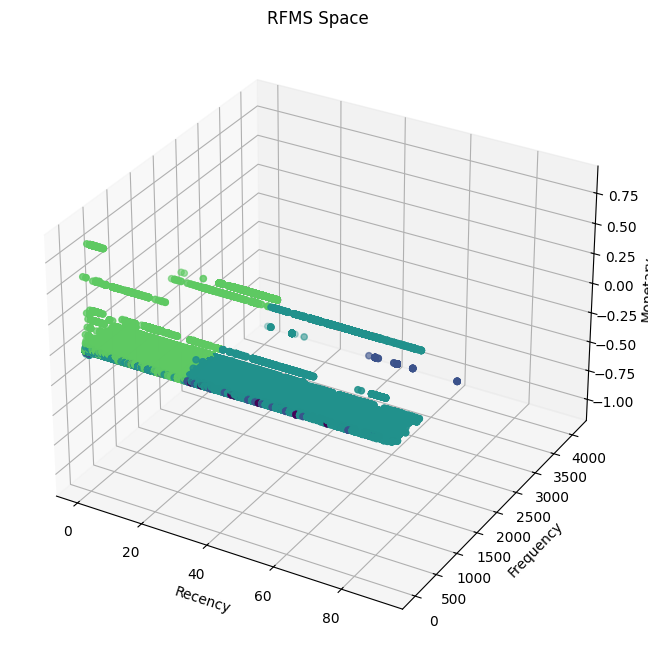

In [54]:
# Visualize all transactions in the RFMS space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['RFMS_Score'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFMS Space')
plt.show()

In [55]:
# Display RFMS features
df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Stability']].drop_duplicates()

,CustomerId,Recency,Frequency,Monetary,Stability
0,2991,90,119,109921.75,3042.294251
2,3195,10,2,1000.00,0.000000
3,488,86,38,228727.20,17169.241610
5,809,0,1,2000.00,0.000000
6,1815,86,29,93400.00,5493.966126
...,...,...,...,...,...
95653,167,0,16,22610.00,1668.559134
95655,471,0,44,120795.00,6413.666676
95657,1992,0,573,2438140.00,22554.029939
95659,2598,0,43,58499.60,2274.756582


#### Step 3: Establish a boundary where users are classified as high and low RFMS scores

* Use the RFMS scores to establish a boundary where users are classified as high and low risk
* Use the quantile function to find the boundary

In [41]:
# Establish a boundary where users are classified as high and low RFMS scores
boundary = df['RFMS_Score'].quantile(0.75)

# Create a new column 'RFMS_Class' based on the boundary
df['RFMS_Class'] = pd.cut(df['RFMS_Score'], bins=[0, boundary, float('inf')], labels=[0, 1])

In [44]:
df.sample(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,Recency,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed,CustomerId_Value_mean,CustomerId_Value_min,CustomerId_Value_max,CustomerId_Value_std,ProductId_ProductCategory,CustomerId_TransactionId_ct,CustomerId_ProductId_ct,CustomerId_ProductCategory_ct,Value_Mean_Ratio,Value_Mean_Minus,CustomerId_ProductId_Value_mean,CustomerId_ProductId_Value_min,CustomerId_ProductId_Value_max,CustomerId_ProductId_Value_std,CustomerId_ProductCategory_Value_mean,CustomerId_ProductCategory_Value_min,CustomerId_ProductCategory_Value_max,CustomerId_ProductCategory_Value_std,CustomerId_ProductCategory_Value_Ratio,CustomerId_ProductId_Value_Ratio,CustomerId_FE,TransactionId_FE,meanTransactionPercustomer,pc1,pc2,pc3,kmeans,Frequency,Monetary,Stability,Recency_Score,Frequency_Score,Monetary_Score,Stability_Score,RFMS_Score,RFMS_Class,Risk_Label,TransactionStartTime_Month_WoE,TransactionStartTime_Day_WoE,TransactionStartTime_Hour_WoE,CustomerId_Value_mean_WoE,CustomerId_Value_std_WoE
51735,114323,48890,2672,1955,2002,0,0,2,3,0,2,1000.0,1000,2019-01-06 16:21:15,1,0,288325.0,1610.75419,179,38,2939.430287,1,1,6,6,6,0,0,0,0,0,0,16,21,15,1546791675,1883.100586,10.0,16650.0,2983.404541,4_airtime,179.0,7.0,4.0,0.531039,-883.100586,952.380952,500,1000,150.396302,1403.361345,500,15000,1454.678762,0.712575,1.050000,358.0,2.0,2.0,-0.396591,0.052845,-0.077189,2,179,288325.0,2939.430287,0,1,1,0,0.5,0,0,-0.327609,0.523749,0.121987,NaN,NaN
14342,28399,73531,1761,2335,1307,0,0,0,2,0,2,500.0,500,2018-12-04 06:05:38,3,0,24137.0,965.48000,25,54,1373.363545,12,49,4,1,338,0,0,0,0,0,0,6,5,38,1543903538,1066.520020,18.0,3500.0,1293.158691,3_airtime,25.0,5.0,3.0,0.468814,-566.520020,642.857143,500,1000,243.975018,625.000000,500,1000,231.455025,0.800000,0.777778,50.0,2.0,2.0,-0.481986,0.157390,0.176628,2,25,24137.0,1373.363545,0,1,1,0,0.5,0,0,0.019594,-0.578514,0.303805,NaN,NaN
49337,37060,21149,3065,1162,2317,0,0,0,16,7,2,3500.0,3500,2019-01-02 18:45:15,2,0,48026.0,2183.00000,22,35,3100.018111,1,1,2,2,2,0,0,0,0,0,0,18,45,15,1546454715,2341.090820,70.0,11330.0,3035.084229,19_tv,22.0,7.0,3.0,1.495030,1158.909180,3025.000000,1600,3500,879.529095,3947.777778,1600,11330,2888.000077,0.886575,1.157025,44.0,2.0,2.0,-0.302423,0.342222,-0.055351,2,22,48026.0,3100.018111,0,1,1,0,0.5,0,0,-0.327609,-0.578514,0.377105,NaN,NaN


#### Step 4: Assign all users the good and bad label

* Use the FraudResult column to assign a good or bad label to each user
* Use the apply function to assign the labels

In [42]:
# Assign all users the good and bad label
df['Risk_Label'] = df['FraudResult'].apply(lambda x: 1 if x == 1 else 0)

#### Step 5: Perform Weight of Evidence (WoE) binning

* Use the woe_binning function to perform WoE binning on the selected features
* Use the n_bins parameter to specify the number of bins

In [59]:
# Perform Weight of Evidence (WoE) binning
def calculate_woe_iv(df, feature, target):
    temp = pd.crosstab(df[feature], df[target], margins=False)
    temp['Good'] = temp[0]
    temp['Bad'] = temp[1]
    temp['Total'] = temp['Good'] + temp['Bad']
    
    # Add a small value to avoid division by zero
    eps = 1e-6
    temp['GoodRate'] = (temp['Good'] + eps) / (temp['Good'].sum() + eps)
    temp['BadRate'] = (temp['Bad'] + eps) / (temp['Bad'].sum() + eps)
    
    temp['WoE'] = np.log(temp['GoodRate'] / temp['BadRate'])
    temp['IV'] = (temp['GoodRate'] - temp['BadRate']) * temp['WoE']
    
    woe_dict = temp['WoE'].to_dict()
    iv = temp['IV'].sum()
    return woe_dict, iv

rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
woe_iv_dict = {}

for feature in rfms_features:
    woe_dict, iv = calculate_woe_iv(df, feature, 'Risk_Label')
    woe_iv_dict[feature] = {'WoE': woe_dict, 'IV': iv}
    df[feature + '_WoE'] = df[feature].map(woe_dict)

# Display WoE and IV values
for feature, values in woe_iv_dict.items():
    print(f"Feature: {feature}")
    print(f"WoE: {values['WoE']}")
    print(f"IV: {values['IV']}")
    print()

Feature: Recency
WoE: {0: -0.8716848471530898, 1: -1.2778034139415722, 2: -0.8201365109214646, 3: -0.9812612104384085, 4: -1.1589539053423734, 5: -0.8311637050557996, 6: 0.44122379778910686, 7: 1.499591375952081, 8: 15.922304791750523, 9: 14.89027282860823, 10: -0.6547907534897817, 11: 0.07152256560926837, 12: 1.4025197179035602, 13: -0.07918361407653557, 14: 1.1838415673334957, 15: 1.012841815077315, 16: 0.7789950800302294, 17: -0.22920957606107648, 18: 0.9133378316090173, 19: 1.2274320033819626, 20: 14.623759180804697, 21: -0.820136593872232, 22: 1.100648274766293, 23: 14.527367335220795, 24: 14.587057813987949, 25: 14.624659676137137, 26: 14.816536396545033, 27: 14.4371039229385, 28: 14.705878732352048, 29: 14.82024422429781, 30: -0.00032002029284307007, 31: 14.005234641220289, 32: 0.4041329542792575, 33: 14.298752494710815, 34: 14.08707660384234, 35: 0.4412232984396771, 36: 14.301243156020165, 37: 14.03000882316495, 38: 13.969486153838618, 39: -0.8461020959975131, 40: 0.38780606101

In [63]:
# Build a logistic regression model using the binned RFMS features
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['Risk_Label']

logit_model = Logit(y, X)
result = logit_model.fit()

# Print the model summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.033560
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Risk_Label   No. Observations:                95662
Model:                          Logit   Df Residuals:                    95658
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                  -1.309
Time:                        00:39:49   Log-Likelihood:                -3210.4
converged:                       True   LL-Null:                       -1390.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Recency_WoE      -0.2693      0.010    -26.348      0.000      -0.289      -0.249
Frequency_WoE    -0.0610      0.008     -7.361      0.000      -0.077      -0.045
Monetary_WoE     -1.1320      0.129     -8.765      0.000      -1.385      -0.879
Stability_WoE     0.7355      0.130      5.668      0.000       0.481       0.990
=================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [68]:
# Predict and classify users as good or bad
df['predicted_prob'] = result.predict(X)
df['predicted_label'] = np.where(df['predicted_prob'] > 0.5, 1, 0)

# Display the classification results
df[['CustomerId', 'predicted_prob', 'predicted_label']].drop_duplicates()

,CustomerId,predicted_prob,predicted_label
0,2991,1.114100e-04,0
2,3195,1.491724e-07,0
3,488,1.512357e-04,0
5,809,3.115303e-07,0
6,1815,1.585454e-04,0
...,...,...,...
95653,167,8.608143e-03,0
95655,471,5.882436e-03,0
95657,1992,2.123831e-03,0
95659,2598,1.357663e-02,0


In [65]:
# Evaluate model performance
auc = roc_auc_score(y, df['predicted_prob'])
print(f'AUC: {auc}')

AUC: 0.9974255267844045


In [66]:
# Confusion Matrix
cm = confusion_matrix(y, df['predicted_label'])
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y, df['predicted_label']))

Confusion Matrix:
[[93687  1782]
 [    2   191]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     95469
           1       0.10      0.99      0.18       193

    accuracy                           0.98     95662
   macro avg       0.55      0.99      0.58     95662
weighted avg       1.00      0.98      0.99     95662



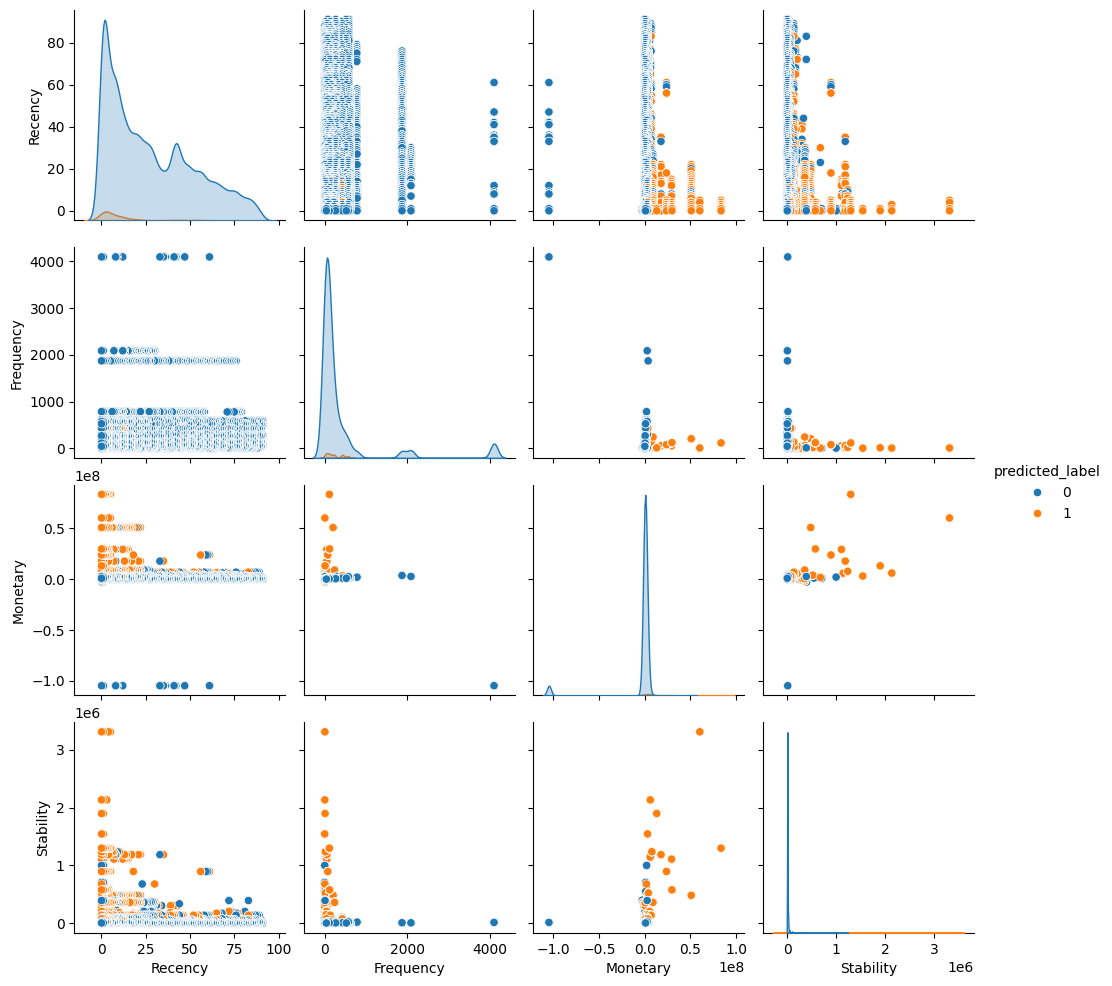

In [69]:
# Plotting RFMS space visualization
sns.pairplot(df, vars=rfms_features, hue='predicted_label')
plt.show()

In [93]:
df.sample(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransationCount,StdTransactionAmount,TransactionStartTime_Month,TransactionStartTime_Week,TransactionStartTime_Day,TransactionStartTime_Dayofweek,TransactionStartTime_Dayofyear,TransactionStartTime_Is_month_end,TransactionStartTime_Is_month_start,TransactionStartTime_Is_quarter_end,TransactionStartTime_Is_quarter_start,TransactionStartTime_Is_year_end,TransactionStartTime_Is_year_start,TransactionStartTime_Hour,TransactionStartTime_Minute,TransactionStartTime_Second,TransactionStartTime_Elapsed,CustomerId_Value_mean,CustomerId_Value_min,CustomerId_Value_max,CustomerId_Value_std,ProductId_ProductCategory,CustomerId_TransactionId_ct,CustomerId_ProductId_ct,CustomerId_ProductCategory_ct,Value_Mean_Ratio,Value_Mean_Minus,CustomerId_ProductId_Value_mean,CustomerId_ProductId_Value_min,CustomerId_ProductId_Value_max,CustomerId_ProductId_Value_std,CustomerId_ProductCategory_Value_mean,CustomerId_ProductCategory_Value_min,CustomerId_ProductCategory_Value_max,CustomerId_ProductCategory_Value_std,CustomerId_ProductCategory_Value_Ratio,CustomerId_ProductId_Value_Ratio,CustomerId_FE,TransactionId_FE,meanTransactionPercustomer,pc1,pc2,pc3,kmeans,Recency,Frequency,Monetary,Stability,Recency_WoE,Frequency_WoE,Monetary_WoE,Stability_WoE,predicted_prob,predicted_label
89662,29135,59042,3185,1670,2406,0,0,5,2,0,2,500.0,500,2019-02-08 11:23:48,2,0,364103.15,1542.809958,236,1997.375715,2,6,8,4,39,0,0,0,0,0,0,11,23,48,1549625028,1626.788086,12.0,8110.0,1992.353394,3_airtime,236.0,8.0,4.0,0.307354,-1126.788086,1550.039216,500,5000,1175.695572,1409.395833,500,5000,1066.080519,0.354762,0.322572,472.0,2.0,2.0,-0.395811,-0.129328,-0.063972,2,4,236,364103.15,1997.375715,15.262764,-0.337399,13.075476,13.075476,8.049018e-05,0
13791,96680,14083,10,3247,2219,0,0,3,1,1,3,-500.0,500,2018-12-03 10:36:51,3,0,1251763.68,4186.500602,299,10716.558736,12,49,3,0,337,0,0,0,0,0,0,10,36,51,1543833411,5294.284180,2.0,100000.0,10213.067383,2_data_bundles,299.0,8.0,3.0,0.094441,-4794.284180,3340.697674,500,19500,5273.811612,3647.126437,500,30000,5971.503824,0.137094,0.149669,598.0,2.0,2.0,-0.306267,-0.250590,-0.146879,2,71,299,1251763.68,10716.558736,-1.154011,13.312087,13.312087,13.312087,2.838758e-03,0
45716,80236,88802,778,1999,583,0,0,0,2,0,2,1000.0,1000,2018-12-29 02:47:54,3,0,1000.00,1000.000000,1,0.000000,12,52,29,5,363,0,0,0,0,0,0,2,47,54,1546051674,1000.000000,1000.0,1000.0,NaN,3_airtime,1.0,1.0,1.0,1.000000,0.000000,1000.000000,1000,1000,-1.000000,1000.000000,1000,1000,-1.000000,1.000000,1.000000,2.0,2.0,2.0,-0.410267,0.217308,-0.048530,2,46,1,1000.00,0.000000,15.276460,-1.952518,13.104705,-1.574980,7.642904e-09,0


In [71]:
# Preprocessed data
df.to_csv('../data/cleaned/cleaned_data.csv', index=False)